# Задачи по NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Напишите функцию, возвращающую нулевой вектор длины 10, у которого пятая компонента единица.

In [2]:
def null_vec():
    ###BEGIN SOLUTION
    a = np.zeros(10)
    a[4] = 1
    ###END SOLUTION
    return a

In [3]:
###BEGIN HIDDEN TESTS
assert np.allclose( null_vec() , np.array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))
assert str(type(null_vec()))=="<class 'numpy.ndarray'>"
###END HIDDEN TESTS

2.Переверните вектор: [1, 2, 3]->[3,2,1]

In [4]:
def reverse_vec(v):
    ###BEGIN SOLUTION
    v_rev = v[::-1]
    ###END SOLUTION
    return v_rev

In [5]:
###BEGIN HIDDEN TESTS
np.random.seed()
vec = np.random.rand(10)
assert np.allclose(reverse_vec(vec) , vec[::-1])
###END HIDDEN TESTS

3.Создайте матрицу 3x3, в которой величины будут идти по порядку от 0 до 8: 

\begin{equation*} 
\begin{pmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8 
\end{pmatrix}
\end{equation*}

In [6]:
def matrix():
    ###BEGIN SOLUTION
    m = np.arange(9).reshape((3, 3))
    ###END SOLUTION
    return m
matrix()

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [7]:
###BEGIN HIDDEN TESTS
assert np.allclose(matrix() , np.arange(9).reshape((3, 3)))
###END HIDDEN TESTS

4. Постройте матрицу размером 8х8 по принципу шахматной доски.

In [8]:
def checkerboard(w, b):
    """Создает матрицу по принципу шахматной доски.
    Parameters
    ----------
    w: Символ, обозначающий белую клетку
    b: Символ, обозначающий черную клетку
    
    Returns
    -------
    m: Матрица 8х8.
    """
    ###BEGIN SOLUTION
    m = np.array([b if abs((i//8)%2-i%2)==1 else w for i in range(64)]).reshape(8,8)
    ###END SOLUTION
    return m

In [9]:
###BEGIN HIDDEN TESTS
black = np.random.randint(5)
white = np.random.randint(5)
assert np.allclose(checkerboard(white, black) , np.array([black if abs((i//8)%2-i%2)==1 else white for i in range(64)]).reshape(8,8))
###END HIDDEN TESTS

5. Напишите функцию, которая переводит декартовы координаты в полярные.

In [10]:
def cartesian_to_polar(c):
    """Переводит массив, состоящий из 10 пар координат xy 
    в массив координат r phi.
    
    Parameters
    ----------
    c: Array of int.
    Массив размерами 10х2, каждая строка -- декартовы координаты точки. 
    
    Returns
    -------
    p: Array of int. 
    Аналогичный массив из пар полярных координат. В первом столбике r.
    """
    ###BEGIN SOLUTION
    p=np.zeros(20).reshape(10,2)
    p[:,0] = np.sqrt(c[:,0]**2+c[:,1]**2)
    p[:,1] = np.arctan2(c[:,1], c[:,0])
    ###END SOLUTION
    return p

In [11]:
###BEGIN HIDDEN TESTS
cart = np.array([np.random.randint(-10,10) for i in range(20)]).reshape(10, 2)
polar = cartesian_to_polar(cart)
assert np.allclose(polar[:, 0]*np.sin(polar[:, 1]), cart[:,1])
assert np.allclose(polar[:, 0]*np.cos(polar[:, 1]), cart[:,0])
###END HIDDEN TESTS

6. Улитка Пасскаля -- плоская кривая, задаваемая уравнением в полярных координатах: $𝑟=𝑎+cos𝜙.$ 

Напишите функцию, определяющую координаты точек такой кривой.
(Подсказка: np.linspace создает одномерный массив из указанного количества элементов, значения которых равномерно распределенны внутри заданного интервала.)

In [12]:
def make_curve(n, a):
    '''Функция возвращает массив nх2, содержащий n пар 
    декартовых координат точек кривой Паскаля'''
    ###BEGIN SOLUTION
    phi = np.linspace(-np.pi,np.pi,n)
    r = a + np.cos(phi) 
    x = [r[:] * np.cos(phi[:])]
    y = [r[:] * np.sin(phi[:])]
    xy = np.concatenate((x, y)).T
    ###END SOLUTION
    return xy

In [14]:
N = 50
A = 1
m = make_curve(N, A)
###BEGIN HIDDEN TESTS
check = m[np.random.choice(np.arange(N), 10)]
check = cartesian_to_polar(check)
assert np.allclose(check[:,0]-A, np.cos(check[:, 1]))
###END HIDDEN TESTS

Постройте ее на плоскости xy для разных значений a.

Text(0.5, 1.0, 'Snail curve, a=1')

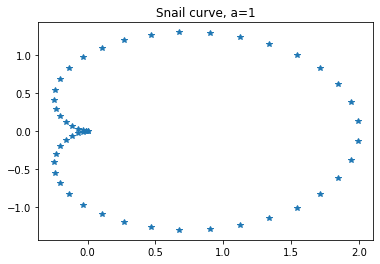

In [15]:
plt.plot(m[:,0], m[:, 1], '*')
plt.title('Snail curve, a='+str(A))